In [1]:
using Pkg
Pkg.add("IJulia")
Pkg.add("Plots")
Pkg.add("DifferentialEquations")
Pkg.add("FFTW")

    Updating registry at `~/.julia/registries/General`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
   Installed VertexSafeGraphs ────────── v0.1.2
   Installed SimpleTraits ────────────── v0.9.3
   Installed StatsFuns ───────────────── v0.9.8
   Installed RecursiveArrayTools ─────── v2.11.4
   Installed SteadyStateDiffEq ───────── v1.6.3
   Installed DifferentialEquations ───── v6.17.1
   Installed CheapThreads ────────────── v0.2.4
   Installed SciMLBase ───────────────── v1.13.4
   Installed DimensionalPlotRecipes ──── v1.2.0
   Installed PoissonRandom ───────────── v0.4.0
   Installed ParameterizedFunctions ──── v5.10.0
   Installed TimerOutputs ────────────── v0.5.9
   Installed DiffEqNoiseProcess 

    Building Random123 → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/7c6710c8198fd4444b5eb6a3840b7d47bd3593c5/build.log`
Precompiling project...
  ✓ CommonSolve
  ✓ CEnum
  ✓ PoissonRandom
  ✓ DocStringExtensions
  ✓ SafeTestsets
  ✓ FastBroadcast
  ✓ DimensionalPlotRecipes
  ✓ TreeViews
  ✓ Combinatorics
  ✓ AbstractTrees
  ✓ RandomExtensions
  ✓ PDMats
  ✓ StatsAPI
  ✓ PositiveFactorizations
  ✓ RuntimeGeneratedFunctions
  ✓ IterativeSolvers
  ✓ RandomNumbers
  ✓ FunctionWrappers
  ✓ Inflate
  ✓ ConstructionBase
  ✓ FastClosures
  ✓ UnPack
  ✓ MuladdMacro
  ✓ TimerOutputs
  ✓ FiniteDiff
  ✓ DiffResults
  ✓ ExponentialUtilities
  ✓ LabelledArrays
  ✓ ArnoldiMethod
  ✓ ResettableStacks
  ✓ Rmath_jll
  ✓ Hwloc_jll
  ✓ ZygoteRules
  ✓ CommonSubexpressions
  ✓ QuadGK
  ✓ SimpleTraits
  ✓ SuiteSparse_jll
  ✓ Distances
  ✓ Random123
  ✓ DiffRules
  ✓ LogExpFunctions
  ✓ Parameters
  ✓ Rmath
  ✓ Hwloc
  ✓ Setfield
  ✓ Sundials_jll
  ✓ RecursiveArrayTools
  ✓ AbstractAlgebra


In [60]:
using DifferentialEquations

function d_duffing(du, u, h, p, t)
    α, β, γ, ε, τ = p
    hist = h(p, t-τ)[1]; x = u[1]; y = u[2];
    du[1] = y
    du[2] = γ * y + α * x + β * hist + ε * x^3
end

h(p, t) = [0.4; 0]

τ = 0.25
lags = [τ]

1-element Vector{Float64}:
 0.25

In [61]:
α = -0.01; β = -0.5; γ = -0.2; ε = -1.0
p = (α, β, γ, ε, τ)
tspan = (0.0, 50.0)
u0 = [0.4, 0.0]

prob = DDEProblem(d_duffing, u0, h, tspan, p; constant_lags=lags)

DDEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 50.0)
u0: 2-element Vector{Float64}:
 0.4
 0.0

In [62]:
alg = MethodOfSteps(Tsit5())
sol = solve(prob, alg, reltol=1e-8, abstol=1e-8)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 225-element Vector{Float64}:
  0.0
  0.013946847132899613
  0.05777451868435043
  0.11896371129908262
  0.19006263886783134
  0.25
  0.3347908796991491
  0.4193614227930476
  0.5
  0.5964546048064479
  0.6963376299872848
  0.75
  0.840932486716879
  ⋮
 46.40221770253269
 46.75586040952215
 47.21670662960463
 47.53693943780879
 47.89022482434671
 48.208973870350675
 48.5325463086235
 48.84647578695056
 49.16212101970591
 49.47714235164223
 49.79533638237893
 50.0
u: 225-element Vector{Vector{Float64}}:
 [0.4, 0.0]
 [0.39997395947579895, -0.003732487595148301]
 [0.39955450050681657, -0.015390265631569837]
 [0.3981196177179525, -0.03146968133044295]
 [0.395227161306821, -0.04983453976841433]
 [0.39178361717037735, -0.06502354717516062]
 [0.3853764412083795, -0.08599734431679815]
 [0.37724356520566227, -0.10620802896130684]
 [0.3679276706252295, -0.12471214699409292]
 [0.354874482421681, -0.14573588066795165]
 [0

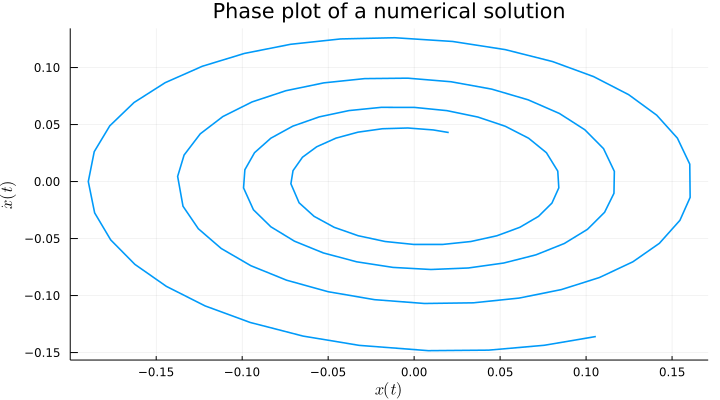

In [63]:
using Plots
ind = floor(Int, length(sol)/2)
plot(sol[1,ind:end], sol[2,ind:end], 
    xlabel = "\$x(t)\$", 
    ylabel = "\$\\dot{x}\\,(t)\$", 
    line = 1.6, 
    title = "Phase plot of a numerical solution", 
    size = (720, 400), 
    legend = false, 
)

In [8]:
a = 30
app_period = 6
timestep = 0.1

f_tmp = sol(a + app_period/2:timestep:a+3*app_period/2)
find_period = abs.(f_tmp .- sol(a))
(~,ind) = findmin(find_period[1,:])
b = a+app_period/2 + timestep*(ind-1)


36.3

In [9]:
using FFTW

# フーリエ級数を求める
# 周期関数なので、a~bを当分割し、その点上でFFTする
function ddefouriercoeffs(f, I, N, n)
    a = I[1]; b = I[2];
    # x_j: equidistance node points
    h = (b-a)/(2.0*N+1)
    j = 0:2*N
    x_j = a .+ j*h
    # f_j: function values on node points
    f_j = f(x_j)[n,:]
    return (fftshift(fft(f_j)))/(2*N+1)
end

ddefouriercoeffs (generic function with 1 method)

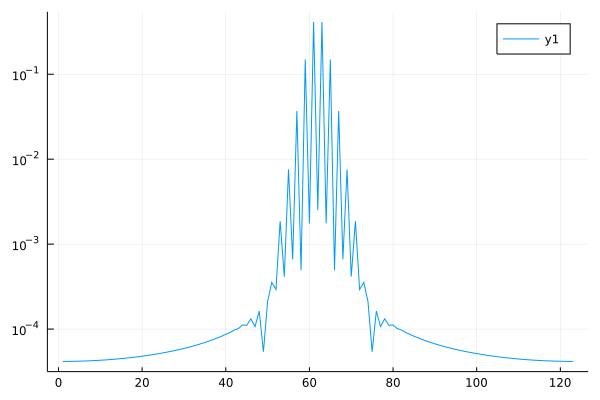

In [11]:
N = 61
x = ddefouriercoeffs(sol,[a,b],N,1)
plot(abs.(x),yscale=:log10,)

In [12]:
# 先生自作のplotする関数
function plot_solution(u, index)
    # index = 1: profile of solution
    #         2: Fourier mode
    #         3: phase profile
    L = 2π/real(u[1])
    a = u[2:end]
    m = length(u)/2
    m_pad = 1000
    a_pad = [zeros(m_pad);a;zeros(m_pad)]
    N = m-1
    N_pad = m+m_pad-1
    k = -N_pad:N_pad
    dx = L/(2*N_pad-1)
    x = dx*(0:2*N_pad)
    if index == 1
    # Plot profile:
        plot(x,real((2*N_pad+1)*ifft(ifftshift(a_pad))),
            xlabel = "\$t\$",
            ylabel = "\$x\\,(t)\$",
            line   = 1.6,
            title  = "Profile of solution",
            size   = (720,400),
            legend = false,
        )
    elseif index == 2
    # Plot Fourier coefficients:
        plot(-N:N,abs.(a),yscale=:log10,
            xlabel = "\$k\$",
            ylabel = "\$|a_k\\,|\$",
            line   = 1.6,
            title  = "Fourier coefficients of solution",
            size   = (720,400),
            legend = false,
        )
    elseif index == 3
    # Plot phase:
      plot(real((2*N_pad+1)*ifft(ifftshift(a_pad))),real((2*N_pad+1)*ifft(ifftshift(a_pad.*(im*k)))),
            xlabel = "\$x(t)\$",
            ylabel = "\$\\dot{x}\\,(t)\$",
            line   = 1.6,
            title  = "Phase plot of a numerical solution",
            size   = (720,400),
            legend = false,
        )
    end
end
function plot_solution!(u)
    L = 2π/real(u[1])
    a = u[2:end]
    m = length(u)/2
    m_pad = 1000
    a_pad = [zeros(m_pad);a;zeros(m_pad)]
    N = m-1
    N_pad = m+m_pad-1
    k = -N_pad:N_pad
    dx = L/(2*N_pad-1)
    x = dx*(0:2*N_pad)
    plot!(real((2*N_pad+1)*ifft(ifftshift(a_pad))),real((2*N_pad+1)*ifft(ifftshift(a_pad.*(im*k)))),line=1.6,)
end

plot_solution! (generic function with 1 method)

In [13]:
x0 = [2*pi/(b-a);x]
plot_solution!(x0)

# 近似的な初期値はこれで十分

┌ Warning: No strict ticks found
└ @ PlotUtils /Users/shojiro/.julia/packages/PlotUtils/es5pb/src/ticks.jl:283
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/shojiro/.julia/packages/PlotUtils/es5pb/src/ticks.jl:283


In [14]:
# 離散畳み込み
function convp(a,p)
    M  = Int((length(a) + 1)/2)
    n  = (p-1)*M
    ta = [zeros(n); a; zeros(n)]
    tb = ifft(ifftshift(ta))
    tc = fftshift(fft(tb.^p))*(2*p*M-1)^(p-1)
    return tc[n+1:end-n], tc[p:end-p+1]
end

# 微分方程式のフーリエ係数に対するマップ
function F_fourier(x, p, η₀)
    (α, β, γ, ϵ, τ) = p
    N = (length(x)-2)/2
    ω = x[1]
    a = x[2:end]
    (a³,~) = convp(a,3)
    eta = sum(a) - η₀

    k = -N:N
    f = (k.^2 * ω^2 + im * γ * k * ω .+ α + β * exp.(-im*k*ω*τ)).*a + ϵ*a³

    return [eta;f]
end

# ヤコビ行列
function DF_fourier(x, p)
    (α, β, γ, ϵ, τ) = p
    N = Int((length(x)-2)/2)
    ω = x[1]
    a = x[2:end]
    k = -N:N

    DF = zeros(ComplexF64,2*N+2,2*N+2)

    DF[1,2:end] .= 1
    DF[2:end,1] = (2*ω*k.^2 + im*γ*k - im*k*τ*β.*exp.(-im*k*ω*τ)).*a

    (~,a2) = convp(a,2)
    
    M = zeros(ComplexF64,2*N+1, 2*N+1)

    for j=-N:N
        M[k.+(N+1), j+N+1] = 3.0*ϵ*a2[k.-j.+(2*N+1)]
    end
    
    L = diagm(k.^2*ω^2 + im*γ*k*ω .+ α + β*exp.(-im*k*ω*τ))
    
    DF[2:end,2:end] = L + M
    return DF
end

DF_fourier (generic function with 1 method)

In [16]:
using LinearAlgebra
# Initial value of Newton method
η₀ = real(sum(x0[2:end]))
x = x0

# ニュートン反復
# Newton iteration
tol = 5e-10
F = F_fourier(x, p, η₀)
println("Before step #1, ||F||_1 = $(norm(F,1))")
num_itr = 0

while num_itr ≤ 100
    x = x - DF_fourier(x, p)\F # 連立一次方程式を解く
    num_itr += 1
    F = F_fourier(x, p, η₀)
    println("After step #$(num_itr), ||F||_1 = $(norm(F,1))")
    if norm(F,1) < tol
        break
    end
end

L = 2π/real(x[1])
plot_solution(x, 3)

Before step #1, ||F||_1 = 8.013785058736975
After step #1, ||F||_1 = 0.06849607784230047
After step #2, ||F||_1 = 0.00038464337883415794
After step #3, ||F||_1 = 6.299895397948734e-8
After step #4, ||F||_1 = 2.0205468413313973e-14


GKS: Rectangle definition is invalid in routine SET_VIEWPORT
GKS: Rectangle definition is invalid in routine SET_VIEWPORT
GKS: Rectangle definition is invalid in routine SET_VIEWPORT
GKS: Rectangle definition is invalid in routine SET_VIEWPORT
GKS: Rectangle definition is invalid in routine SET_VIEWPORT
GKS: Rectangle definition is invalid in routine SET_VIEWPORT
GKS: Rectangle definition is invalid in routine SET_VIEWPORT
GKS: Rectangle definition is invalid in routine SET_VIEWPORT
GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [19]:
plot_solution(x, 2)

GKS: Rectangle definition is invalid in routine SET_VIEWPORT
GKS: Rectangle definition is invalid in routine SET_VIEWPORT
GKS: Rectangle definition is invalid in routine SET_VIEWPORT
GKS: Rectangle definition is invalid in routine SET_VIEWPORT
GKS: Rectangle definition is invalid in routine SET_VIEWPORT
GKS: Rectangle definition is invalid in routine SET_VIEWPORT
GKS: Rectangle definition is invalid in routine SET_VIEWPORT
GKS: Rectangle definition is invalid in routine SET_VIEWPORT
GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [18]:
L

6.283129057441059